<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [47]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [49]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [50]:
## rEAD csv file
boston_df = pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [51]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


##### Getting the basic info

In [52]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


#### For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 0, 'Median Value ($1,000s)')

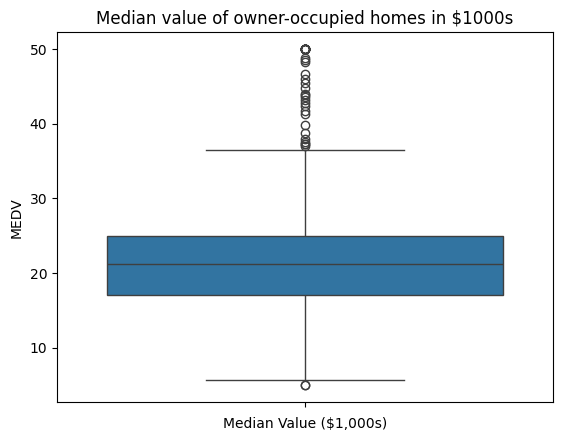

In [54]:
# Below box plot shows the median values of owner-occupied homes in $1000s
ax = sns.boxplot(y='MEDV', data=boston_df).set_title('Median value of owner-occupied homes in $1000s')
pyplot.xlabel('Median Value ($1,000s)')

#### Provide a histogram for the Charles river variable

Text(0.5, 28.999999999999986, 'Tracting Charles River (1.0) or not (0.0)')

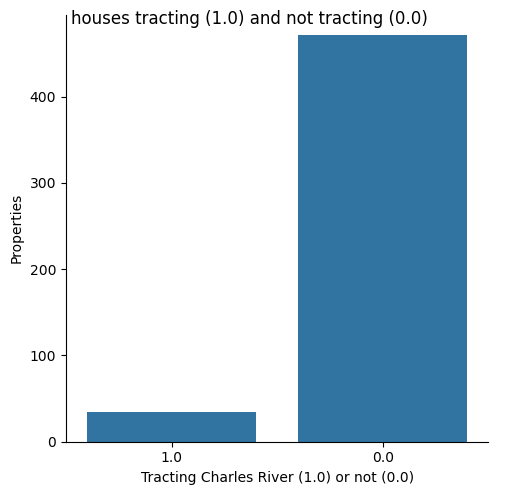

In [55]:
# Below bar plot shows the number of houses tracting (1.0) and not tracting (0.0) the Charles River
sns.catplot(x='CHAS', kind='count', data=boston_df, order=[1.0, 0.0]).fig.suptitle('houses tracting (1.0) and not tracting (0.0)')
pyplot.ylabel('Properties')
pyplot.xlabel('Tracting Charles River (1.0) or not (0.0)')

#### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0, 0.5, 'Home Age Groups')

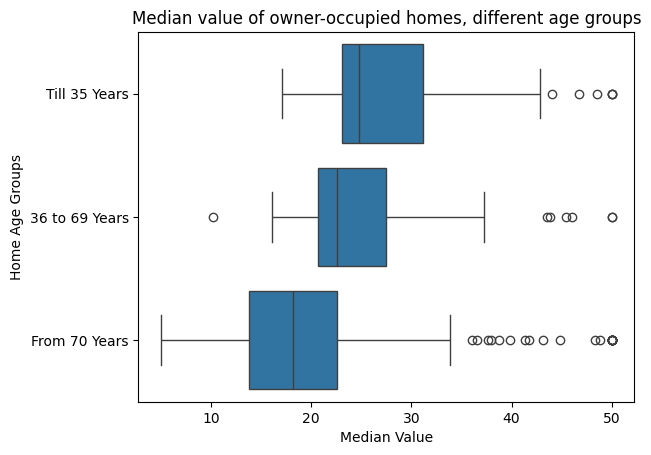

In [57]:
# use the dot loc function to create 3 age groups
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = 'Till 35 Years'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = '36 to 69 Years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = 'From 70 Years'

# creating 3 different boxplots for each age group
ax = sns.boxplot(y="age_group", x="MEDV", data=boston_df, order=['Till 35 Years','36 to 69 Years','From 70 Years']).set_title('Median value of owner-occupied homes, different age groups')
pyplot.xlabel('Median Value')
pyplot.ylabel('Home Age Groups')

#### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 9.444444444444438, 'Nitric Oxide Levels')

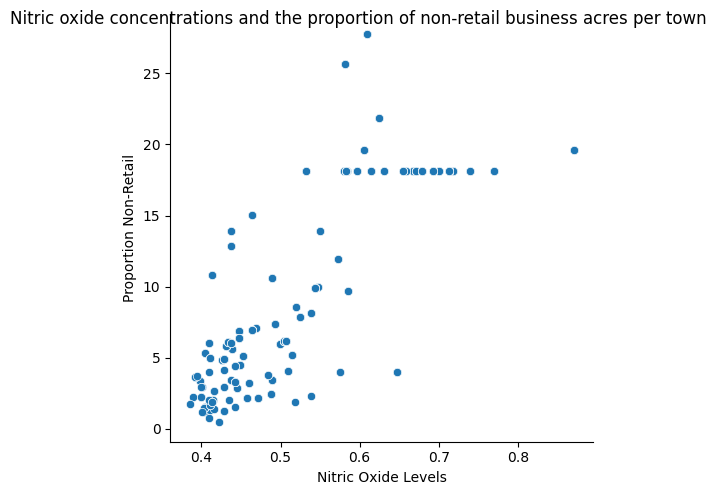

In [58]:
sns.relplot(x="NOX", y="INDUS", data=boston_df).fig.suptitle('Nitric oxide concentrations and the proportion of non-retail business acres per town')
plt.ylabel('Proportion Non-Retail')
plt.xlabel('Nitric Oxide Levels')

#### Create a histogram for the pupil to teacher ratio variable

Text(0.5, 28.999999999999986, 'Pupil-teacher ratio')

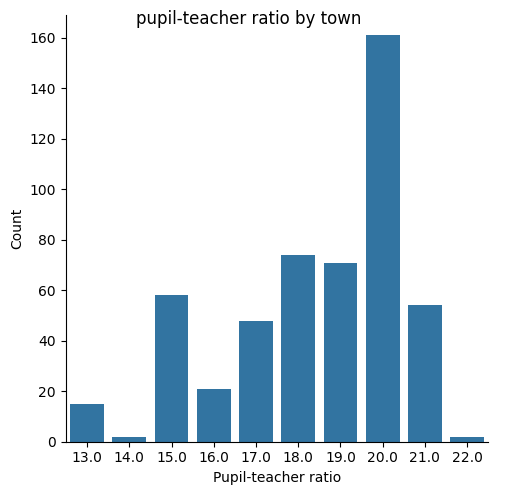

In [63]:
# using these values I create the histogram
sns.catplot(x='PTRATIO', kind='count', data=boston_df).fig.suptitle('pupil-teacher ratio by town')
pyplot.ylabel('Count')
pyplot.xlabel('Pupil-teacher ratio')

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [67]:
# First I need to see whether or not there is equality of variance, using Levene's test
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], center='mean')

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

In [68]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], equal_var = False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

1. My H0 hypothesis is that there is no significant difference in median value of houses bounded by the Charles river.
2. My H1 hypothesis is that there is a significant difference in median value of houses bounded by the Charles river.

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)


In [ ]:
# Steps:
# First I need to create 3 age groups and test whether or not the variances differ
# H0 is that there is no difference in Variance between any of the age groups
# H1 is that there is a difference in Variance between any of the age groups

In [71]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

# test for difference in variance
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

# separate the samples in 3 separate samples by age group
thirtyfive_lower_medv = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy_medv = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_higher_medv = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

# run the test between the 3 samples
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower_medv, thirtyfive_seventy_medv, seventy_higher_medv)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


1. My H0 is that there is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940
2. My H1 is that there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [72]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

1. My H0 is that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
2. My H1 is that there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

#### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [73]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 28 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        18:12:36   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. H0: additional weighted distance to the five Boston employment centres has no impact on on the median value of owner occupied homes
2. H1: additional weighted distance to the five Boston employment centres has an impact on on the median value of owner occupied homes